In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline

In [2]:
def stringfied_list_to_list(df, col):
    return df[col].apply(lambda x: eval(x))

In [44]:
SEED = 1992

In [45]:
# Read df
df = pd.read_csv('datasets/dataframes/allrecipes_full_preproc.csv')

In [46]:
df.columns

Index(['recipe_name', 'description', 'ingredients_list', 'categories_list',
       'calories', 'fat', 'carbs', 'protein', 'cholesterol', 'sodium',
       'prep_time', 'number_of_rating', 'rating_score', 'number_of_reviews',
       'reviews', 'photos', 'steps', 'made_it', 'page_format',
       'number_of_categories', 'main_category', 'number_of_steps',
       'number_of_ingredients'],
      dtype='object')

In [47]:
target_column = 'rating_score'

nutrient_columns = ['calories', 'fat', 'carbs', 'protein', 'cholesterol', 'sodium']
recipe_columns = ['prep_time', 'number_of_steps', 'number_of_ingredients']
social_columns = ['photos']
category_column = ['main_category']

features_columns = nutrient_columns + recipe_columns + social_columns+ category_column

In [48]:
df = df[[target_column] + features_columns]

In [52]:
df.isna().sum()

rating_score                        0
calories                            0
fat                                 0
carbs                               0
protein                             0
cholesterol                         0
sodium                              0
prep_time                           0
number_of_steps                     0
number_of_ingredients               0
photos                              0
Appetizers and Snacks               0
Bread                               0
Breakfast and Brunch                0
Desserts                            0
Drinks                              0
Everyday Cooking                    0
Fruits and Vegetables               0
Main Dish                           0
Main Dishes                         0
Meat and Poultry                    0
Pasta and Noodles                   0
Salad                               0
Seafood                             0
Side Dish                           0
Soups, Stews and Chili              0
Trusted Bran

In [50]:
df = df.dropna()

In [51]:
df = pd.get_dummies(df, columns = ['main_category'], prefix='', prefix_sep='')

In [38]:
X = df.drop(columns=target_column).values
y = df[target_column].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [54]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
coeff_df = pd.DataFrame(regressor.coef_, df.drop(columns=target_column).columns, columns=['Coefficient'])  
coeff_df

,Coefficient
calories,0.001099
fat,-0.007195
carbs,-0.005411
protein,-0.006544
cholesterol,-0.000190
sodium,0.000018
prep_time,0.000004
number_of_steps,0.015689
number_of_ingredients,0.006681
photos,0.000280


In [15]:
y_pred = regressor.predict(X_test)

In [16]:
results = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
results.plot.scatter(x='actual', y='predicted')

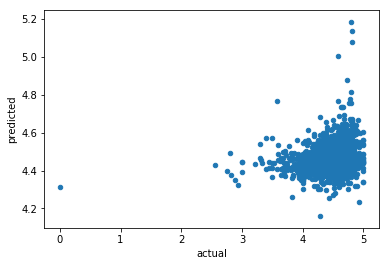

In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.21421159015722152
Mean Squared Error: 0.09566246858978573
Root Mean Squared Error: 0.3092934991068932


In [19]:
y_mean = np.ones(shape=y_pred.shape) * y_train.mean()

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_mean))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_mean))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_mean)))

Mean Absolute Error: 0.2225054694554515
Mean Squared Error: 0.10130811398303075
Root Mean Squared Error: 0.31828935574887


In [55]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

MissingDataError: exog contains inf or nans

In [56]:
import xgboost as xgb

In [74]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 1000, seed=1992, verbose=True, base_score=4.5)

In [75]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=4.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=1992, silent=None, subsample=1, verbose=True, verbosity=1)

In [76]:
y_pred = xg_reg.predict(X_test)

In [77]:
y_pred

array([4.4825425, 4.58513  , 4.655803 , ..., 4.6593347, 4.2177143,
       4.5254917], dtype=float32)

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.21888117663677983
Mean Squared Error: 0.09787890062130626
Root Mean Squared Error: 0.312856038173001


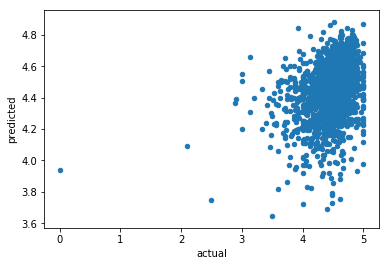

In [79]:
results = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
results.plot.scatter(x='actual', y='predicted')